In [1]:
using Dates
using MarketData
using StatsBase
using Plots
using DataFrames
using Statistics
include("Chapter 05 Financial Labels Snippets.jl")


(process:4992): GLib-GIO-WARNING **: 17:16:49.257: Unexpectedly, UWP app `30008NitroOfficeDVDApp.NebulaeBookReader_2.1.3.0_x86__k9060n443y9rm' (AUMId `30008NitroOfficeDVDApp.NebulaeBookReader_k9060n443y9rm!App') supports 15 extensions but has no verbs


binsFromTrend

# Data
We import bitcoin data from Yahoo finance from 2021.

In [2]:
btc = yahoo("BTC-USD", YahooOpt(period1 = DateTime(2021, 3, 1), period2 = DateTime(2021, 6, 1)))["Close"]

93×1 TimeArray{Float64, 1, Date, Vector{Float64}} 2021-03-01 to 2021-06-01
│            │ Close      │
├────────────┼────────────┤
│ 2021-03-01 │ 49631.2422 │
│ 2021-03-02 │ 48378.9883 │
│ 2021-03-03 │ 50538.2422 │
│ 2021-03-04 │ 48561.168  │
│ 2021-03-05 │ 48927.3047 │
│ 2021-03-06 │ 48912.3828 │
│ 2021-03-07 │ 51206.6914 │
│ 2021-03-08 │ 52246.5234 │
│ 2021-03-09 │ 54824.1172 │
   ⋮
│ 2021-05-25 │ 38402.2227 │
│ 2021-05-26 │ 39294.1992 │
│ 2021-05-27 │ 38436.9688 │
│ 2021-05-28 │ 35697.6055 │
│ 2021-05-29 │ 34616.0664 │
│ 2021-05-30 │ 35678.1289 │
│ 2021-05-31 │ 37332.8555 │
│ 2021-06-01 │ 36684.9258 │

# Implement the trend scanning method
The trend for each point is evaluated on top of its strength

In [3]:
trends = binsFromTrend(timestamp(btc), btc, [3, 5, 10])

83×4 TimeArray{Any, 2, DateTime, Matrix{Any}} 2021-03-01T00:00:00 to 2021-05-22T00:00:00
│                     │ End_Time                        │ tStatistic │ Trend │
├─────────────────────┼─────────────────────────────────┼────────────┼───────┤
│ 2021-03-01T00:00:00 │ DateTime("2021-03-11T00:00:00") │ 5.1022     │ 1     │
│ 2021-03-02T00:00:00 │ DateTime("2021-03-12T00:00:00") │ 7.1895     │ 1     │
│ 2021-03-03T00:00:00 │ DateTime("2021-03-13T00:00:00") │ 8.0836     │ 1     │
│ 2021-03-04T00:00:00 │ DateTime("2021-03-14T00:00:00") │ 12.633     │ 1     │
│ 2021-03-05T00:00:00 │ DateTime("2021-03-15T00:00:00") │ 9.7375     │ 1     │
│ 2021-03-06T00:00:00 │ DateTime("2021-03-16T00:00:00") │ 20.4075    │ 1     │
│ 2021-03-07T00:00:00 │ DateTime("2021-03-17T00:00:00") │ 8.1452     │ 1     │
│ 2021-03-08T00:00:00 │ DateTime("2021-03-18T00:00:00") │ 9.4985     │ 1     │
│ 2021-03-09T00:00:00 │ DateTime("2021-03-19T00:00:00") │ 3.6227     │ 1     │
   ⋮
│ 2021-05-15T00:00:00 │ DateTime("202

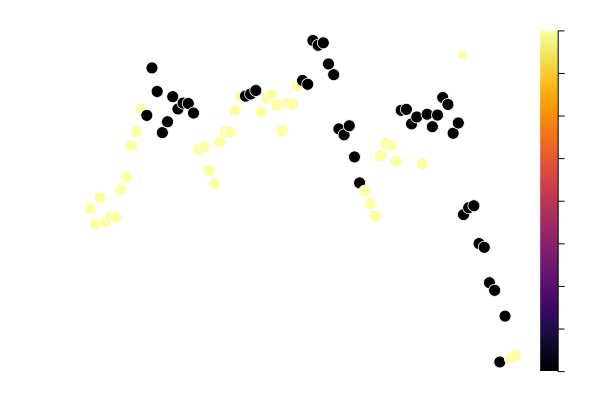

In [13]:
scatter(trends.Close, marker_z = values(trends.Trend), label = "BTC", background = :transparent, title = "BTC Trends", markersize = 7)

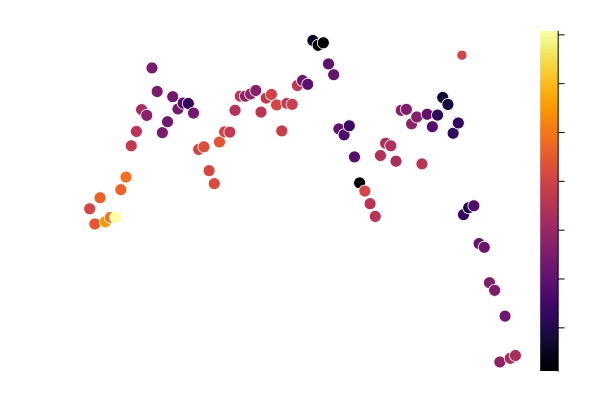

In [14]:
scatter(trends.Close, marker_z = values(trends.tStatistic), label = "BTC", background = :transparent, title = "BTC Trends with strength", markersize = 7)